In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# for regression modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# for statistical analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [73]:
# Create sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2

In [74]:
X.shape

(100, 1)

In [75]:
y.shape

(100,)

In [76]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 1.235801124184988
Coefficient: 1.9066757959664882


In [79]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([ 2.44765281, 18.29725763, 15.96000523, 13.86795316,  6.1698964 ,
        9.62808219,  6.80605243, 17.69238524,  1.62828069,  8.37706692,
        9.47159225, 12.81971177, 16.78400681, 19.32797199,  3.51607566,
        4.21057078, 15.94142615,  2.64759258, 17.10778347,  4.48714332,
       18.81295403, 18.15207175,  5.0429328 ,  1.89147873, 20.05253548,
        4.73273052,  3.56267461, 11.20262146, 14.73644958,  1.34108999])

In [80]:
# Evaluate the model
mse      = mean_squared_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

MSE: 2.5238
R^2 Score: 0.9412


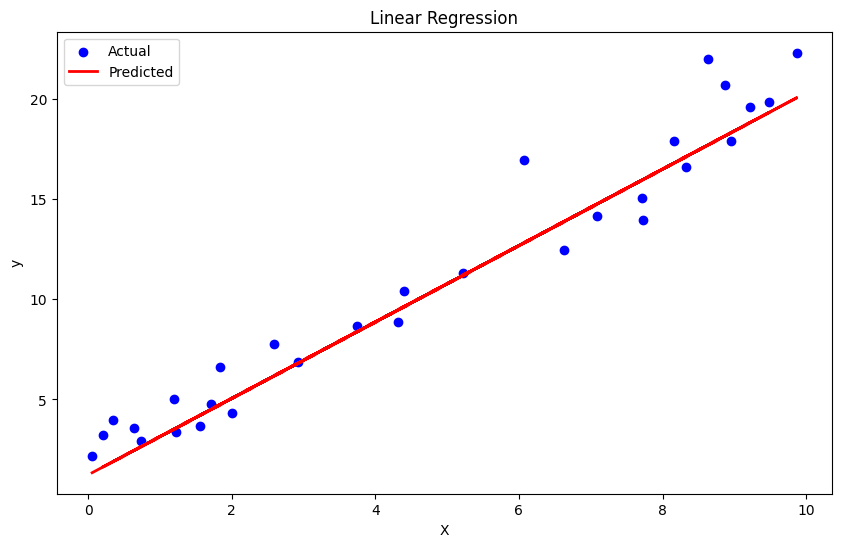

In [81]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [82]:
df = pd.DataFrame({"X": X.squeeze(), 'y':y})
model = ols('y ~ X', data=df).fit()

# get summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     968.9
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.31e-52
Time:                        13:13:48   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4302      0.341      4.199      0.0

In [83]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,3189.7424,3189.7424,968.884,1.3123e-52
Residual,98.0,322.6338,3.2922,NaN,NaN


In [84]:
# create SAS-like ANOVA table
def create_anova_table(model):
    # Get model statistics
    anova_table = sm.stats.anova_lm(model, typ=1)
    
    # Calculate additional statistics
    df_total = anova_table['df'].sum()
    ss_total = anova_table['sum_sq'].sum()
    ms_model = anova_table['sum_sq'][0] / anova_table['df'][0]
    ms_error = anova_table['sum_sq'][1] / anova_table['df'][1]
    ms_total = ss_total / df_total
    f_value = ms_model / ms_error
    p_value = model.f_pvalue
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    
    # Create a more SAS-like format
    sas_anova = pd.DataFrame({
        'Source': ['Model', 'Error', 'Corrected Total'],
        'DF': [anova_table['df'][0], anova_table['df'][1], df_total],
        'Sum of Squares': [anova_table['sum_sq'][0], anova_table['sum_sq'][1], ss_total],
        'Mean Square': [ms_model, ms_error, np.nan],
        'F Value': [f_value, np.nan, np.nan],
        'Pr > F': [p_value, np.nan, np.nan]
    })
    
    # Format the table nicely
    pd.set_option('display.precision', 4)
    
    # Create the parameter estimates table (similar to SAS)
    parameter_table = pd.DataFrame({
        'Parameter': ['Intercept'] + model.model.exog_names[1:],
        'Estimate': model.params,
        'Standard Error': model.bse,
        't Value': model.tvalues,
        'Pr > |t|': model.pvalues
    })
    
    return sas_anova, parameter_table, r_squared, adj_r_squared

In [85]:
# Generate and print the SAS-like ANOVA table
anova_table, parameter_table, r_squared, adj_r_squared = create_anova_table(model)

In [86]:
print("\n" + "="*80)
print("                             Analysis of Variance")
print("="*80)
print(anova_table.to_string(index=False))
print("\nR-Square:", f"{r_squared:.4f}")
print("Adj R-Square:", f"{adj_r_squared:.4f}")
print("\n" + "="*80)
print("                           Parameter Estimates")
print("="*80)
print(parameter_table.to_string(index=False))


                             Analysis of Variance
         Source   DF  Sum of Squares  Mean Square  F Value     Pr > F
          Model  1.0       3189.7424    3189.7424  968.884 1.3123e-52
          Error 98.0        322.6338       3.2922      NaN        NaN
Corrected Total 99.0       3512.3762          NaN      NaN        NaN

R-Square: 0.9081
Adj R-Square: 0.9072

                           Parameter Estimates
Parameter  Estimate  Standard Error  t Value   Pr > |t|
Intercept    1.4302          0.3406   4.1994 5.8998e-05
        X    1.9080          0.0613  31.1269 1.3123e-52


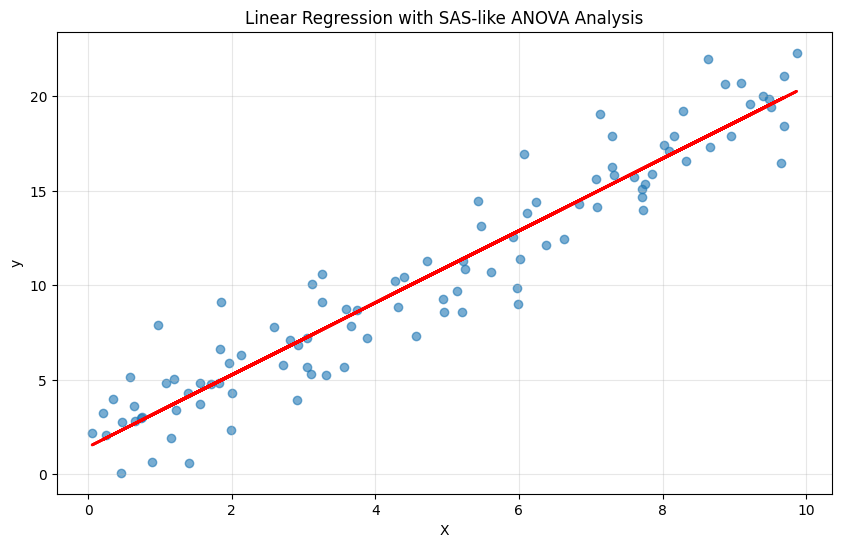

In [87]:
# Visualize the regression
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['y'], alpha=0.6)
plt.plot(df['X'], model.predict(), 'r-', linewidth=2)
plt.title('Linear Regression with SAS-like ANOVA Analysis')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.show()